# 1. Get RAM Price Dataset

In [7]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
csv_path = os.path.abspath(os.path.join(os.pardir))+'/dataset/toy_data/ram_price.csv'

In [5]:
ram_price = pd.read_csv(csv_path)

In [8]:
ram_price.shape

(333, 3)

In [9]:
ram_price.head()

,Unnamed: 0,date,price
0,0,1957.0,411041792.0
1,1,1959.0,67947725.0
2,2,1960.0,5242880.0
3,3,1965.0,2642412.0
4,4,1970.0,734003.0


In [10]:
ram_price.columns

Index(['Unnamed: 0', 'date', 'price'], dtype='object')

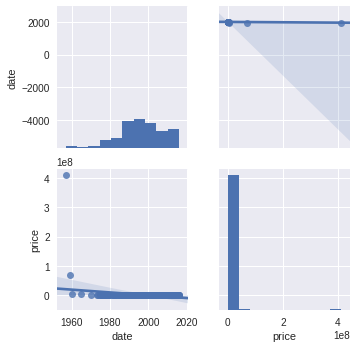

In [14]:
g = sns.pairplot(ram_price, vars=["date", "price"], kind="reg")

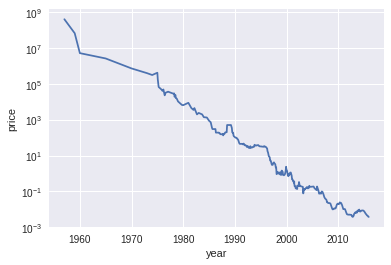

In [16]:
plt.semilogy(ram_price.date, ram_price.price)
plt.xlabel('year')
plt.ylabel('price')

# 2. Analysis

## 2-1. DecisionTree Regression & Linear Regression

In [33]:
from sklearn import tree
from sklearn import linear_model

In [18]:
data_train = ram_price[ram_price.date < 2000]
data_test = ram_price[ram_price.date >=2000]

In [20]:
data_train.shape

(202, 3)

In [21]:
X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

In [24]:
X_train.shape

(202, 1)

In [25]:
y_train.shape

(202,)

In [29]:
dt_reg = tree.DecisionTreeRegressor().fit(X_train, y_train)

In [34]:
linear_reg = linear_model.LinearRegression().fit(X_train, y_train)

In [35]:
X_all = ram_price.date[:, np.newaxis]

In [36]:
pred_tree = dt_reg.predict(X_all)
pred_lr = linear_reg.predict(X_all)

In [37]:
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

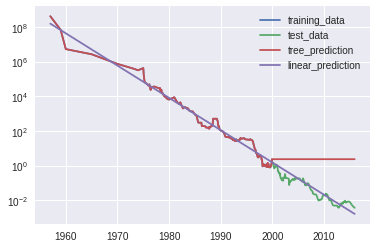

In [39]:
plt.semilogy(data_train.date, data_train.price, label='training_data')
plt.semilogy(data_test.date, data_test.price, label='test_data')
plt.semilogy(ram_price.date, price_tree, label='tree_prediction')
plt.semilogy(ram_price.date, price_lr, label='linear_prediction')
plt.legend()